# Import Dependencies

In [37]:
# Essentials
import pandas as pd #DataFrame
import numpy as np #Linear Algebra
import datetime # Date Time
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#SK-learn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#PCA
from sklearn.decomposition import PCA



# Load Data

In [38]:
train  = pd.read_csv('raw_data/train_data.csv')
test  = pd.read_csv('raw_data/test_data.csv')

In [39]:
train.head()

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,...,wind-vwnd-925-2010-11,wind-vwnd-925-2010-12,wind-vwnd-925-2010-13,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20
0,0,0.0,0.833333,9/1/14,237.00,29.02,31.64,29.57,30.73,29.71,...,-27.68,-37.21,8.32,9.56,-2.03,48.13,28.09,-13.50,11.90,4.58
1,1,0.0,0.833333,9/2/14,228.90,29.02,31.64,29.57,30.73,29.71,...,-21.13,-36.57,8.77,21.17,4.44,48.60,27.41,-23.77,15.44,3.42
2,2,0.0,0.833333,9/3/14,220.69,29.02,31.64,29.57,30.73,29.71,...,-10.72,-34.16,6.99,32.16,5.01,48.53,19.21,-33.16,15.11,4.82
3,3,0.0,0.833333,9/4/14,225.28,29.02,31.64,29.57,30.73,29.71,...,0.33,-31.04,6.17,39.66,-1.41,50.59,8.29,-37.22,18.24,9.74
4,4,0.0,0.833333,9/5/14,237.24,29.02,31.64,29.57,30.73,29.71,...,9.83,-31.80,7.47,38.62,-5.21,54.73,-2.58,-42.30,21.91,10.95


In [40]:
test.head()

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,...,wind-vwnd-925-2010-11,wind-vwnd-925-2010-12,wind-vwnd-925-2010-13,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20
0,375734,0.0,0.833333,11/1/22,339.88,30.88,30.92,29.17,31.02,29.47,...,-19.28,-39.77,-29.25,40.88,-8.31,14.91,-24.62,31.05,-23.69,6.27
1,375735,0.0,0.833333,11/2/22,334.63,30.88,30.92,29.17,31.02,29.47,...,-19.58,-43.14,-28.62,45.37,-5.42,16.97,-23.94,28.84,-20.61,14.16
2,375736,0.0,0.833333,11/3/22,337.83,30.88,30.92,29.17,31.02,29.47,...,-13.73,-44.22,-27.67,49.76,-1.31,21.44,-19.06,26.85,-16.78,13.42
3,375737,0.0,0.833333,11/4/22,345.81,30.88,30.92,29.17,31.02,29.47,...,-7.97,-49.47,-19.32,52.62,-0.44,21.65,-23.12,23.70,-18.62,10.69
4,375738,0.0,0.833333,11/5/22,357.39,30.88,30.92,29.17,31.02,29.47,...,-0.80,-56.07,-9.89,51.23,-7.57,19.86,-30.56,20.66,-25.08,19.64


In [41]:
target = [i for i in train.columns if i not in test.columns]
target

['contest-tmp2m-14d__tmp2m']

# Describe Data

In [42]:
train.shape

(375734, 246)

In [43]:
test.shape

(31354, 245)

In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375734 entries, 0 to 375733
Columns: 246 entries, index to wind-vwnd-925-2010-20
dtypes: float64(240), int64(4), object(2)
memory usage: 705.2+ MB


In [45]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31354 entries, 0 to 31353
Columns: 245 entries, index to wind-vwnd-925-2010-20
dtypes: float64(241), int64(2), object(2)
memory usage: 58.6+ MB


In [46]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
index,375734.0,187866.500000,108465.207359,0.00,93933.250000,187866.500000,281799.750000,375733.00
lat,375734.0,0.592766,0.251744,0.00,0.409091,0.590909,0.818182,1.00
lon,375734.0,0.517964,0.272059,0.00,0.300000,0.533333,0.766667,1.00
contest-pevpr-sfc-gauss-14d__pevpr,375734.0,276.744064,198.085182,-2.31,104.062500,250.320000,420.010000,1185.14
nmme0-tmp2m-34w__cancm30,375734.0,10.801682,10.952417,-14.96,1.550000,9.950000,20.230000,36.08
...,...,...,...,...,...,...,...,...
wind-vwnd-925-2010-16,375734.0,-9.846867,34.164678,-106.08,-32.170000,-8.560000,10.500000,83.89
wind-vwnd-925-2010-17,375734.0,-6.231860,27.050356,-93.98,-20.170000,-6.030000,11.630000,64.85
wind-vwnd-925-2010-18,375734.0,16.014364,25.847455,-52.61,-0.360000,18.650000,31.210000,90.39
wind-vwnd-925-2010-19,375734.0,10.489945,25.070435,-66.11,-6.790000,11.860000,29.040000,76.89


## Missing Values

In [47]:
missing = []

In [48]:
for col in train.columns:
    na = train[col].isna().sum()
    if na>0:
        print('*'*25, '\n'+col,':')
        print(f"{na} missing values in column {col}")
        missing.append(col)

************************* 
nmme0-tmp2m-34w__ccsm30 :
15934 missing values in column nmme0-tmp2m-34w__ccsm30
************************* 
nmme-tmp2m-56w__ccsm3 :
10280 missing values in column nmme-tmp2m-56w__ccsm3
************************* 
nmme-prate-34w__ccsm3 :
8738 missing values in column nmme-prate-34w__ccsm3
************************* 
nmme0-prate-56w__ccsm30 :
15934 missing values in column nmme0-prate-56w__ccsm30
************************* 
nmme0-prate-34w__ccsm30 :
15934 missing values in column nmme0-prate-34w__ccsm30
************************* 
nmme-prate-56w__ccsm3 :
10280 missing values in column nmme-prate-56w__ccsm3
************************* 
nmme-tmp2m-34w__ccsm3 :
8738 missing values in column nmme-tmp2m-34w__ccsm3
************************* 
ccsm30 :
15934 missing values in column ccsm30


In [49]:
for col in test.columns:
    na = test[col].isna().sum()
    if na>0:
        print('*'*25, '\n'+col,':')
        print(f"{na} missing values in column {col}")

### FillNA with median

In [50]:
for i in missing:
    median = train[i].median()
    train[i] = train[i].fillna(median)

# Convert to Numerical Data

In [51]:
valid_types = ['float64','int64','uint8','datetime64[ns]']

In [52]:
for i in train.columns:
    dtype = train[i].dtype
    if dtype not in valid_types:
        print('*'*25)
        print(i)
        print(train[i].head())

*************************
startdate
0    9/1/14
1    9/2/14
2    9/3/14
3    9/4/14
4    9/5/14
Name: startdate, dtype: object
*************************
climateregions__climateregion
0    BSh
1    BSh
2    BSh
3    BSh
4    BSh
Name: climateregions__climateregion, dtype: object


### One Hot Encoding

#### Climate Regions

In [53]:
climate_regions = pd.get_dummies(train['climateregions__climateregion'])
train = train.join(climate_regions).drop('climateregions__climateregion',axis=1)

In [79]:
climate_regions = pd.get_dummies(test['climateregions__climateregion'])
test = test.join(climate_regions).drop('climateregions__climateregion',axis=1)

In [54]:
train.shape

(375734, 260)

#### StartDate

In [55]:
train['startdate'] = pd.to_datetime(train['startdate'], format = '%m/%d/%y')
ref_date = datetime.datetime(2014, 9, 1)  # Example reference point
train['date'] = (train['startdate'] - ref_date).dt.days
train = train.drop('startdate',axis=1)

In [77]:
test['startdate'] = pd.to_datetime(test['startdate'], format = '%m/%d/%y')
ref_date = datetime.datetime(2014, 9, 1)  # Example reference point
test['date'] = (test['startdate'] - ref_date).dt.days
test = test.drop('startdate',axis=1)

#### Recheck

In [56]:
for i in train.columns:
    dtype = train[i].dtype
    if dtype not in valid_types:
        print('*'*25)
        print(i)
        print(train[i].head())

# PCA

#### Scale Data

In [58]:
data_scaled = train.copy(deep=True)

In [59]:
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data_scaled),columns=data_scaled.columns)
data_scaled.head()

,index,lat,lon,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,...,Csa,Csb,Dfa,Dfb,Dfc,Dsb,Dsc,Dwa,Dwb,date
0,-1.732046,-2.354642,1.159198,-0.200642,1.663408,1.707969,1.926773,1.805495,2.018001,1.847282,...,-0.161084,-0.349672,-0.253342,-0.403604,-0.184947,-0.147881,-0.088561,-0.0625,-0.044151,-1.729683
1,-1.732037,-2.354642,1.159198,-0.241533,1.663408,1.707969,1.926773,1.805495,2.018001,1.847282,...,-0.161084,-0.349672,-0.253342,-0.403604,-0.184947,-0.147881,-0.088561,-0.0625,-0.044151,-1.724944
2,-1.732028,-2.354642,1.159198,-0.282980,1.663408,1.707969,1.926773,1.805495,2.018001,1.847282,...,-0.161084,-0.349672,-0.253342,-0.403604,-0.184947,-0.147881,-0.088561,-0.0625,-0.044151,-1.720205
3,-1.732019,-2.354642,1.159198,-0.259808,1.663408,1.707969,1.926773,1.805495,2.018001,1.847282,...,-0.161084,-0.349672,-0.253342,-0.403604,-0.184947,-0.147881,-0.088561,-0.0625,-0.044151,-1.715466
4,-1.732009,-2.354642,1.159198,-0.199430,1.663408,1.707969,1.926773,1.805495,2.018001,1.847282,...,-0.161084,-0.349672,-0.253342,-0.403604,-0.184947,-0.147881,-0.088561,-0.0625,-0.044151,-1.710728


In [60]:
n = data_scaled.shape[1]

pca = PCA(n_components=n, random_state=1)
data_pc1 = pd.DataFrame(pca.fit_transform(data_scaled))

exp_var = pca.explained_variance_ratio_

Text(0, 0.5, 'Cumulative Explained Variance')

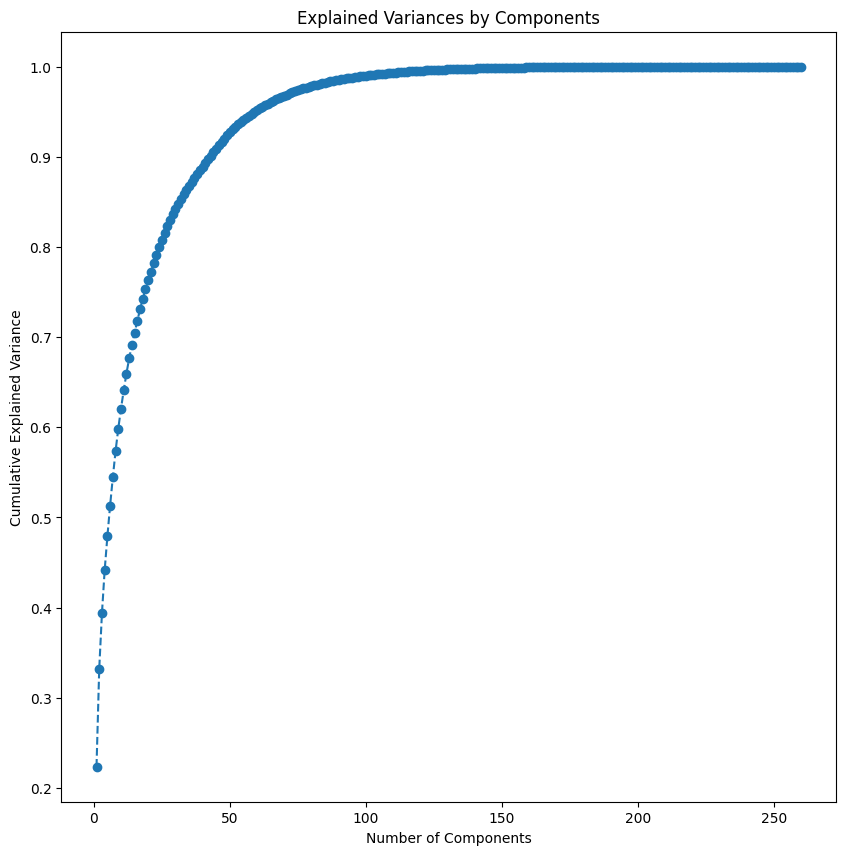

In [61]:
plt.figure(figsize = (10,10))
plt.plot(range(1,261), exp_var.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

In [62]:
sum = 0
for ix, i in enumerate(exp_var):
  sum = sum + i
  if(sum>0.95):
    print("Number of PCs that explain at least 95% variance: ", ix+1)
    break

Number of PCs that explain at least 95% variance:  60


In [63]:
pc_comps = ['PC1','PC2','PC3']
data_pca = pd.DataFrame(np.round(pca.components_[:3,:],2),index=pc_comps,columns=data_scaled.columns)
data_pca = data_pca.T.sort_values("PC1", ascending=False)

In [64]:
def color_high(val):
    if val <= -0.1: # you can decide any value as per your understanding
        return 'background: pink'
    elif val >= 0.1:
        return 'background: skyblue'   

data_pca.style.applymap(color_high)

,PC1,PC2,PC3
nmme0-tmp2m-34w__nmme0mean,0.130000,0.010000,0.050000
nmme-tmp2m-34w__gfdlflora,0.120000,0.050000,-0.030000
nmme-tmp2m-34w__nasa,0.120000,0.040000,-0.040000
nmme-tmp2m-56w__gfdlflora,0.120000,0.050000,-0.030000
nmme0mean,0.120000,-0.010000,0.090000
nmme-tmp2m-56w__nasa,0.120000,0.040000,-0.030000
nmme-tmp2m-56w__nmmemean,0.120000,0.050000,-0.030000
nmme-tmp2m-34w__gfdl,0.120000,0.050000,-0.030000
nmme-tmp2m-34w__gfdlflorb,0.120000,0.050000,-0.030000
nmme-tmp2m-34w__nmmemean,0.120000,0.050000,-0.030000


In [71]:
features = list(data_pca.head(50).index)
len(features)

50

In [72]:
target

['contest-tmp2m-14d__tmp2m']

In [73]:
new_train = pd.concat([train['index'],train[target],train[features].drop('contest-tmp2m-14d__tmp2m',axis=1)],axis=1)
new_train.head()

,index,contest-tmp2m-14d__tmp2m,nmme0-tmp2m-34w__nmme0mean,nmme-tmp2m-34w__gfdlflora,nmme-tmp2m-34w__nasa,nmme-tmp2m-56w__gfdlflora,nmme0mean,nmme-tmp2m-56w__nasa,nmme-tmp2m-56w__nmmemean,nmme-tmp2m-34w__gfdl,...,ccsm40,gfdlflora0,gfdlflorb0,gfdl0,nmme-tmp2m-34w__ccsm3,sst-2010-1,contest-pevpr-sfc-gauss-14d__pevpr,contest-wind-h10-14d__wind-hgt-10,contest-prwtr-eatm-14d__prwtr,icec-2010-9
0,0,28.744480,30.46,28.42,28.55,27.7,30.65,28.38,28.11,28.27,...,30.73,31.66,31.45,31.33,27.57,352.20,237.00,31246.63,42.45,0.03
1,1,28.370585,30.46,28.42,28.55,27.7,30.65,28.38,28.11,28.27,...,30.73,31.66,31.45,31.33,27.57,350.96,228.90,31244.78,42.66,0.03
2,2,28.133059,30.46,28.42,28.55,27.7,30.65,28.38,28.11,28.27,...,30.73,31.66,31.45,31.33,27.57,349.86,220.69,31239.27,43.23,0.03
3,3,28.256798,30.46,28.42,28.55,27.7,30.65,28.38,28.11,28.27,...,30.73,31.66,31.45,31.33,27.57,348.91,225.28,31232.86,43.11,0.03
4,4,28.372353,30.46,28.42,28.55,27.7,30.65,28.38,28.11,28.27,...,30.73,31.66,31.45,31.33,27.57,348.03,237.24,31226.16,42.98,0.03


In [74]:
test_features = [i for i in features if i!='contest-tmp2m-14d__tmp2m']

new_test = pd.concat([test['index'],test[test_features]],axis=1)
new_test.head()

,index,nmme0-tmp2m-34w__nmme0mean,nmme-tmp2m-34w__gfdlflora,nmme-tmp2m-34w__nasa,nmme-tmp2m-56w__gfdlflora,nmme0mean,nmme-tmp2m-56w__nasa,nmme-tmp2m-56w__nmmemean,nmme-tmp2m-34w__gfdl,nmme-tmp2m-34w__gfdlflorb,...,ccsm40,gfdlflora0,gfdlflorb0,gfdl0,nmme-tmp2m-34w__ccsm3,sst-2010-1,contest-pevpr-sfc-gauss-14d__pevpr,contest-wind-h10-14d__wind-hgt-10,contest-prwtr-eatm-14d__prwtr,icec-2010-9
0,375734,30.37,28.28,27.94,26.82,30.77,27.96,27.81,27.79,27.83,...,31.58,31.71,31.84,31.49,27.37,345.33,339.88,31233.02,40.29,0.03
1,375735,30.37,28.28,27.94,26.82,30.77,27.96,27.81,27.79,27.83,...,31.58,31.71,31.84,31.49,27.37,344.50,334.63,31230.63,40.15,0.03
2,375736,30.37,28.28,27.94,26.82,30.77,27.96,27.81,27.79,27.83,...,31.58,31.71,31.84,31.49,27.37,343.40,337.83,31225.26,40.07,0.03
3,375737,30.37,28.28,27.94,26.82,30.77,27.96,27.81,27.79,27.83,...,31.58,31.71,31.84,31.49,27.37,341.91,345.81,31220.87,40.00,0.03
4,375738,30.37,28.28,27.94,26.82,30.77,27.96,27.81,27.79,27.83,...,31.58,31.71,31.84,31.49,27.37,340.22,357.39,31214.54,39.80,0.03


In [80]:
train.to_csv('new_data/full_train.csv',index=False)
test.to_csv('new_data/full_test.csv', index=False)

In [76]:
new_train.to_csv('new_data/train.csv',index=False)
new_test.to_csv('new_data/test.csv', index=False)